# Tweet Sentiment Analysis

In [9]:
import tweepy

# General purpose packages
import os
import numpy as np
import pandas as pd
import re
from pprint import pprint
from bs4 import BeautifulSoup


In [10]:
# Sklearn
import sklearn
from sklearn.datasets import load_files
from sklearn import datasets

In [11]:
import nltk
from nltk.corpus import movie_reviews

In [12]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [13]:
import spacy

In [14]:
from textblob import TextBlob

In [15]:
from nltk import ngrams, bigrams, trigrams
from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import wordnet
from nltk.corpus import stopwords

In [16]:
from wordcloud import WordCloud

In [17]:
# Data Visualization packages

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

In [18]:
# Stop words are words that have low importance in a sentence

stop_words = stopwords.words("english")
print(stop_words)
print(len(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Loading movie_review Dataset

In [19]:
from nltk.corpus import movie_reviews
words = movie_reviews.words()
print(words)

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]


In [20]:
# Total number of words in the movie review
print(len(words))

1583820


In [21]:
categories = movie_reviews.categories()
print(categories)

['neg', 'pos']


In [22]:
cleaned_words = [w for w in words if w not in stop_words and w.isalpha()]

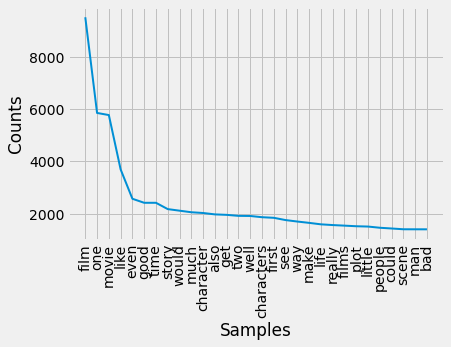

[('film', 9517), ('one', 5852), ('movie', 5771), ('like', 3690), ('even', 2565), ('good', 2411), ('time', 2411), ('story', 2169), ('would', 2109), ('much', 2049), ('character', 2020), ('also', 1967), ('get', 1949), ('two', 1911), ('well', 1906), ('characters', 1859), ('first', 1836), ('see', 1749), ('way', 1693), ('make', 1642), ('life', 1586), ('really', 1558), ('films', 1536), ('plot', 1513), ('little', 1501), ('people', 1455), ('could', 1427), ('scene', 1397), ('man', 1396), ('bad', 1395)]


In [29]:
freq_dist = nltk.probability.FreqDist(cleaned_words)
freq_dist.plot(30)
plt.show()
print(freq_dist.most_common(30))

In [30]:
nltk.FreqDist(cleaned_words).most_common(18)

[('film', 9517),
 ('one', 5852),
 ('movie', 5771),
 ('like', 3690),
 ('even', 2565),
 ('good', 2411),
 ('time', 2411),
 ('story', 2169),
 ('would', 2109),
 ('much', 2049),
 ('character', 2020),
 ('also', 1967),
 ('get', 1949),
 ('two', 1911),
 ('well', 1906),
 ('characters', 1859),
 ('first', 1836),
 ('see', 1749)]

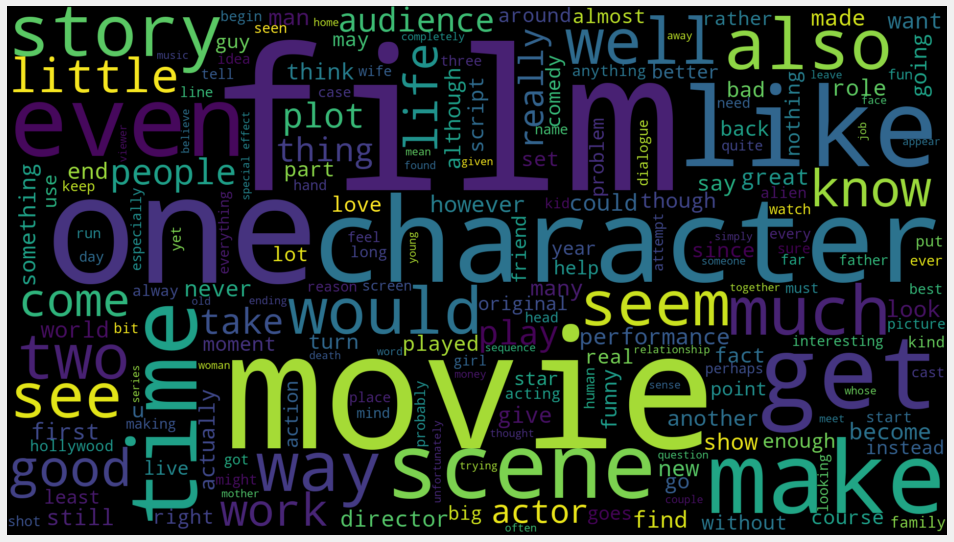

In [36]:
text = " ".join(cleaned_words)
wordcloud = WordCloud(stopwords=stop_words, background_color="black",
                     width=1920, height=1080).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Loading IMDB Dataset

In [38]:
df = pd.read_csv("./Datasets/IMDB.csv")

In [39]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [41]:
df.shape

(50000, 2)

In [42]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [43]:
df.groupby("sentiment").count()

,review
sentiment,
negative,25000
positive,25000


In [44]:
df["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [46]:
# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub("\[[^]]","", text)

# Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text,"html.parser")
    return soup.get_text()

# Removing the noisy text
def clean_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text.lower()

# Apply function to review column
df["cleaned_review"] = df["review"].apply(clean_text)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [47]:
df.head(5)

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. the filming tec...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is..."


In [48]:
def remove_special_characters(text):
    return re.sub(r"[^a-zA-Z0-9\s]","",text)

In [49]:
# Apply function on cleaned_review column
df["cleaned_review"] = df["cleaned_review"].apply(remove_special_characters)

In [50]:
df.head(6)

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...
5,"Probably my all-time favorite movie, a story o...",positive,probably my alltime favorite movie a story of ...
